<a href="https://colab.research.google.com/github/shadab4150/Clustering_projects/blob/master/rossman.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import cohen_kappa_score
from scipy.stats import mode
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

from fastai.vision import *
from fastai.metrics import error_rate
import xgboost as xgb
from matplotlib import pyplot

In [1]:
!unzip '/content/rossmann-store-sales.zip' -d '/content/rose/'

Archive:  /content/rossmann-store-sales.zip
  inflating: /content/rose/sample_submission.csv  
  inflating: /content/rose/store.csv  
  inflating: /content/rose/test.csv  
  inflating: /content/rose/train.csv  


In [0]:
from ML_custom_fun_opt import *
from pandas.api.types import *
def add_datepart(df, fldnames, drop=True, time=False, errors="raise"):
      
    import re  

    if isinstance(fldnames,str): 
        fldnames = [fldnames]
    for fldname in fldnames:
        fld = df[fldname]
        fld_dtype = fld.dtype
        if isinstance(fld_dtype, pd.core.dtypes.dtypes.DatetimeTZDtype):
            fld_dtype = np.datetime64

        if not np.issubdtype(fld_dtype, np.datetime64):
            df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True, errors=errors)
        targ_pre = re.sub('[Dd]ate$', '', fldname)
        attr = ['Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
                'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start']
        if time: attr = attr + ['Hour', 'Minute', 'Second']
        for n in attr: df[targ_pre + n] = getattr(fld.dt, n.lower())
        df[targ_pre + 'Elapsed'] = fld.astype(np.int64) // 10 ** 9
        if drop: df.drop(fldname, axis=1, inplace=True)

In [82]:
train = pd.read_csv('/content/rose/train.csv')
test = pd.read_csv('/content/rose/test.csv')
store = pd.read_csv('/content/rose/store.csv')
sample = pd.read_csv('/content/rose/sample_submission.csv')
store_state = pd.read_csv('/content/rose/store_states.csv')
store_names = pd.read_csv('/content/rose/state_names.csv')
google = pd.read_csv('/content/rose/googletrend.csv')
weather = pd.read_csv('/content/rose/weather.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.



In [56]:
weather.tail()

,file,Date,Max_TemperatureC,Mean_TemperatureC,Min_TemperatureC,Dew_PointC,MeanDew_PointC,Min_DewpointC,Max_Humidity,Mean_Humidity,Min_Humidity,Max_Sea_Level_PressurehPa,Mean_Sea_Level_PressurehPa,Min_Sea_Level_PressurehPa,Max_VisibilityKm,Mean_VisibilityKm,Min_VisibilitykM,Max_Wind_SpeedKm_h,Mean_Wind_SpeedKm_h,Max_Gust_SpeedKm_h,Precipitationmm,CloudCover,Events,WindDirDegrees
15835,Saarland,2015-09-13,21,17,12,16,14,12,100,88,68,1015,1010,1005,31.0,15.0,10.0,27,10,50.0,1.02,7.0,Rain,113
15836,Saarland,2015-09-14,18,14,11,15,12,7,99,85,61,1009,1005,1004,31.0,13.0,4.0,32,16,53.0,9.91,5.0,Rain-Thunderstorm,213
15837,Saarland,2015-09-15,16,12,9,11,8,7,93,77,62,1010,1008,1004,31.0,12.0,10.0,34,14,NaN,0.00,5.0,Rain,193
15838,Saarland,2015-09-16,19,15,11,16,13,10,97,90,75,1004,999,995,31.0,10.0,4.0,32,14,45.0,20.07,7.0,Rain-Thunderstorm,147
15839,Saarland,2015-09-17,14,13,12,14,12,10,99,92,82,1013,1005,999,31.0,14.0,8.0,27,16,47.0,6.10,6.0,Rain,202


In [61]:
print(weather.dtypes)
weather.isna().sum()

file                           object
Date                           object
Max_TemperatureC                int64
Mean_TemperatureC               int64
Min_TemperatureC                int64
Dew_PointC                      int64
MeanDew_PointC                  int64
Min_DewpointC                   int64
Max_Humidity                    int64
Mean_Humidity                   int64
Min_Humidity                    int64
Max_Sea_Level_PressurehPa       int64
Mean_Sea_Level_PressurehPa      int64
Min_Sea_Level_PressurehPa       int64
Max_VisibilityKm              float64
Mean_VisibilityKm             float64
Min_VisibilitykM              float64
Max_Wind_SpeedKm_h              int64
Mean_Wind_SpeedKm_h             int64
Max_Gust_SpeedKm_h            float64
Precipitationmm               float64
CloudCover                    float64
Events                         object
WindDirDegrees                  int64
dtype: object


file                              0
Date                              0
Max_TemperatureC                  0
Mean_TemperatureC                 0
Min_TemperatureC                  0
Dew_PointC                        0
MeanDew_PointC                    0
Min_DewpointC                     0
Max_Humidity                      0
Mean_Humidity                     0
Min_Humidity                      0
Max_Sea_Level_PressurehPa         0
Mean_Sea_Level_PressurehPa        0
Min_Sea_Level_PressurehPa         0
Max_VisibilityKm                381
Mean_VisibilityKm               381
Min_VisibilitykM                381
Max_Wind_SpeedKm_h                0
Mean_Wind_SpeedKm_h               0
Max_Gust_SpeedKm_h            12236
Precipitationmm                   0
CloudCover                     1173
Events                         3951
WindDirDegrees                    0
dtype: int64

In [52]:
len(store_names.StateName.unique())==len(store_names.State.unique())

True

In [0]:

add_datepart(train,'Date',drop=False)
add_datepart(test,fldnames='Date',drop=False)

In [23]:
print(train.shape)
train.head()

(1017209, 22)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800


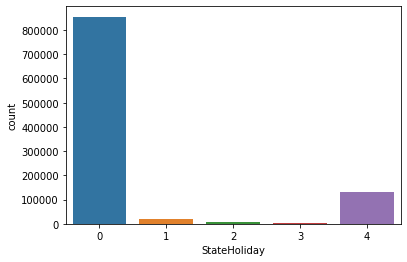

In [103]:
sns.countplot(x=train_new.StateHoliday)

In [0]:
train.StateHoliday.replace({'0':0,'a':1,'b':2,'c':3,0:4},inplace=True)

In [28]:
train.isna().sum()

Store               0
DayOfWeek           0
Date                0
Sales               0
Customers           0
Open                0
Promo               0
StateHoliday        0
SchoolHoliday       0
Year                0
Month               0
Week                0
Day                 0
Dayofweek           0
Dayofyear           0
Is_month_end        0
Is_month_start      0
Is_quarter_end      0
Is_quarter_start    0
Is_year_end         0
Is_year_start       0
Elapsed             0
dtype: int64

In [27]:
print(test.shape)
test.head()

(41088, 21)


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed
0,1,1,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000
1,2,3,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000
2,3,7,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000
3,4,8,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000
4,5,9,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000


In [0]:
def extract_time_features(df):
    df['Date'] = pd.to_datetime(df['Date'])
    df['month'] = df['Date'].dt.month
    df['hour'] = df['Date'].dt.hour
    df['year'] = df['Date'].dt.year
    df['dayofweek'] = df['Date'].dt.dayofweek
    df['weekofyear'] = df['Date'].dt.weekofyear
    return df

In [92]:
store.fillna(-999,inplace=True)
store.head()


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,-999.0,-999.0,-999
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,-999.0,-999.0,-999
4,5,a,a,29910.0,4.0,2015.0,0,-999.0,-999.0,-999


In [93]:
store.isna().sum()
#store.shape

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [62]:
train_new.dtypes

Store                        int64
DayOfWeek                    int64
Date                datetime64[ns]
Sales                        int64
Customers                    int64
Open                         int64
Promo                        int64
StateHoliday                object
SchoolHoliday                int64
Year                         int64
Month                        int64
Week                         int64
Day                          int64
Dayofweek                    int64
Dayofyear                    int64
Is_month_end                  bool
Is_month_start                bool
Is_quarter_end                bool
Is_quarter_start              bool
Is_year_end                   bool
Is_year_start                 bool
Elapsed                      int64
State                       object
dtype: object

In [195]:
cus=train_new[['Store','Week','Customers']].groupby(['Store','Week']).agg({'Customers':'mean'})
cus.reset_index(inplace=True)
cus.columns=['Store','Week','Avg_week_cus']
cus.head()

,Store,Week,Avg_week_cus
0,1,1,422.800000
1,1,2,517.000000
2,1,3,469.523810
3,1,4,489.142857
4,1,5,489.666667


In [305]:
cusD=train[['Store','Dayofyear','Customers']].groupby(['Store','Dayofyear']).agg({'Customers':'mean'})
cusD.reset_index(inplace=True)
cusD.columns=['Store','Dayofyear','Avg_day_cus']
cusD.head()

,Store,Dayofyear,Avg_day_cus
0,1,1,0.000000
1,1,2,647.666667
2,1,3,591.666667
3,1,4,426.333333
4,1,5,449.000000


In [0]:
train_new = train.merge(store,left_on='Store',right_on='Store',how='left')

In [0]:
train_new = train_new.merge(store_state,left_on='Store',right_on='Store',how='left')

In [0]:
train_new = train_new.merge(cus,left_on=['Store','Week'],right_on=['Store','Week'],how='left')

In [0]:
train_new1 = train_new.merge(cusD,left_on=['Store','Dayofyear'],right_on=['Store','Dayofyear'],how='left')

In [0]:
test_new = test.merge(store,left_on='Store',right_on='Store',how='left')

In [0]:
test_new = test_new.merge(cus,left_on=['Store','Week'],right_on=['Store','Week'],how='left')

In [0]:
test_new = test_new.merge(store_state,left_on='Store',right_on='Store',how='left')

In [0]:
test_new1 = test_new.merge(cusD,left_on=['Store','Dayofyear'],right_on=['Store','Dayofyear'],how='left')

In [220]:
test_new.shape[0]==test.shape[0]

True

In [315]:
train_new1.head(3)

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State,Avg_week_cus,open_na,Avg_day_cus
0,1,5,2015-07-31,5263,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,a,1270.0,9.0,2008.0,0,-999.0,-999.0,-999,HE,516.526316,False,584.666667
1,2,5,2015-07-31,6064,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH,572.789474,False,756.666667
2,3,5,2015-07-31,8314,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NW,712.842105,False,911.333333


In [316]:
test_new1.head(3)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_week_cus,State,open_na,Avg_day_cus
0,1,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000,c,a,1270.0,9.0,2008.0,0,-999.0,-999.0,-999,431.428571,HE,False,496.0
1,3,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",609.071429,NW,False,760.0
2,7,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000,a,c,24000.0,4.0,2013.0,0,-999.0,-999.0,-999,783.857143,SH,False,948.5


In [32]:
print(test_new.shape)
print(train_new.shape)

(41088, 30)
(1017209, 31)


In [47]:
train_new.shape[0]==train.shape[0]

True

In [252]:
train_new.head(3)

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State,Avg_week_cus,open_na
0,1,5,2015-07-31,5263,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,a,1270.0,9.0,2008.0,0,-999.0,-999.0,-999,HE,516.526316,False
1,2,5,2015-07-31,6064,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH,572.789474,False
2,3,5,2015-07-31,8314,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NW,712.842105,False


In [253]:
test_new.head(3)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_week_cus,State,open_na
0,1,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000,c,a,1270.0,9.0,2008.0,0,-999.0,-999.0,-999,431.428571,HE,False
1,3,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",609.071429,NW,False
2,7,4,2015-09-17,1.0,1,0,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000,a,c,24000.0,4.0,2013.0,0,-999.0,-999.0,-999,783.857143,SH,False


In [0]:
train_new.drop(['Customers'],axis=1,inplace=True)

In [0]:
idcode=test_new.Id.values

In [0]:
test_new.drop(['Id'],axis=1,inplace=True)

In [106]:
test_new.isna().sum()

Store                0
DayOfWeek            0
Date                 0
Open                11
Promo                0
StateHoliday         0
SchoolHoliday        0
Year                 0
Month                0
Week                 0
Day                  0
Dayofweek            0
Dayofyear            0
Is_month_end         0
Is_month_start       0
Is_quarter_end       0
Is_quarter_start     0
Is_year_end          0
Is_year_start        0
Elapsed              0
State                0
dtype: int64

In [0]:
train_cats(train_new)

In [0]:
train_cats(test_new)

In [0]:
open_na=[]
for i in test_new.Open.values:
  if i==0 or i==1:
    open_na.append(False)
  else:
    open_na.append(True)

In [232]:
open_na.count(True)

11

In [0]:
#train_new.to_csv('clean_train.csv',index=False)
#test_new.to_csv('clean_test.csv',index=False)


In [0]:
train_new1.to_csv('/content/drive/My Drive/CSV files/clean_train_ross.csv',index=False)
test_new1.to_csv('/content/drive/My Drive/CSV files/clean_test_ross.csv',index=False)

In [0]:
test_new['open_na']=open_na

In [241]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [254]:
train_new.head(3)

,Store,DayOfWeek,Date,Sales,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State,Avg_week_cus,open_na
0,1,5,2015-07-31,5263,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,c,a,1270.0,9.0,2008.0,0,-999.0,-999.0,-999,HE,516.526316,False
1,2,5,2015-07-31,6064,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",TH,572.789474,False
2,3,5,2015-07-31,8314,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",NW,712.842105,False


In [0]:
df,y,nas=proc_df(train_new1,'Sales')
df_test,y1,nas=proc_df(test_new1,y_fld=None)

In [320]:
df.head(3)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,State,Avg_week_cus,open_na,Avg_day_cus
0,1,5,942,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,3,1,1270.0,9.0,2008.0,0,-999.0,-999.0,1,5,516.526316,False,584.666667
1,2,5,942,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,1,1,570.0,11.0,2007.0,1,13.0,2010.0,3,12,572.789474,False,756.666667
2,3,5,942,1,1,0,1,2015,7,31,31,4,212,True,False,False,False,False,False,1438300800,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,3,7,712.842105,False,911.333333


In [326]:
set(df.columns.tolist()).difference(set(df_test.columns.tolist())),set(df_test.columns.tolist()).difference(set(df.columns.tolist()))

(set(), set())

In [327]:
df_test.head(3)

,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Week,Day,Dayofweek,Dayofyear,Is_month_end,Is_month_start,Is_quarter_end,Is_quarter_start,Is_year_end,Is_year_start,Elapsed,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Avg_week_cus,State,open_na,Avg_day_cus
0,1,4,48,1.0,1,1,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000,3,1,1270.0,9.0,2008.0,0,-999.0,-999.0,1,431.428571,4,False,496.0
1,3,4,48,1.0,1,1,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000,1,1,14130.0,12.0,2006.0,1,14.0,2011.0,3,609.071429,6,False,760.0
2,7,4,48,1.0,1,1,0,2015,9,38,17,3,260,False,False,False,False,False,False,1442448000,1,3,24000.0,4.0,2013.0,0,-999.0,-999.0,1,783.857143,8,False,948.5


In [0]:
#df.drop(['Customers'],axis=1,inplace=True)

In [0]:
df_test.drop(['Open_na'],axis=1,inplace=True)

In [0]:
df.shape[1]==df_test.shape[1]

True

In [265]:
df.shape

(1017209, 32)

In [0]:
from sklearn.model_selection import train_test_split,KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [0]:
X_train, X_test, y_train, y_test = train_test_split(df[:180000], y[:180000], test_size=0.33, random_state=324,shuffle=True)

In [0]:
def rmspe_metric(act,pred):
  score=[]
  for i in range(len(act)):
    if act[i]!=0:
      ans=((act[i]-pred[i])/act[i])**2
      score.append(ans)
    else:
      ans=(((act[i]+1)-(pred[i]+1))/(act[i]+1))**2
      score.append(ans)
  return sqrt(np.mean(score))

In [0]:
np.seterr(divide = 'ignore')
df_train['feature_log'] = np.where(df_train['feature']>0, np.log(df_train['feature']), 0)

In [270]:
X_train.shape,len(y_train)

((120600, 32), 120600)

In [362]:
clf = RandomForestRegressor(n_estimators=50,n_jobs=-1,max_features='auto',random_state=324)
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=-1, oob_score=False,
                      random_state=324, verbose=0, warm_start=False)

In [392]:
from math import sqrt
y_pred=clf.predict(X_test)
rmspe_metric(y_test,y_pred)

0.11032456330264366

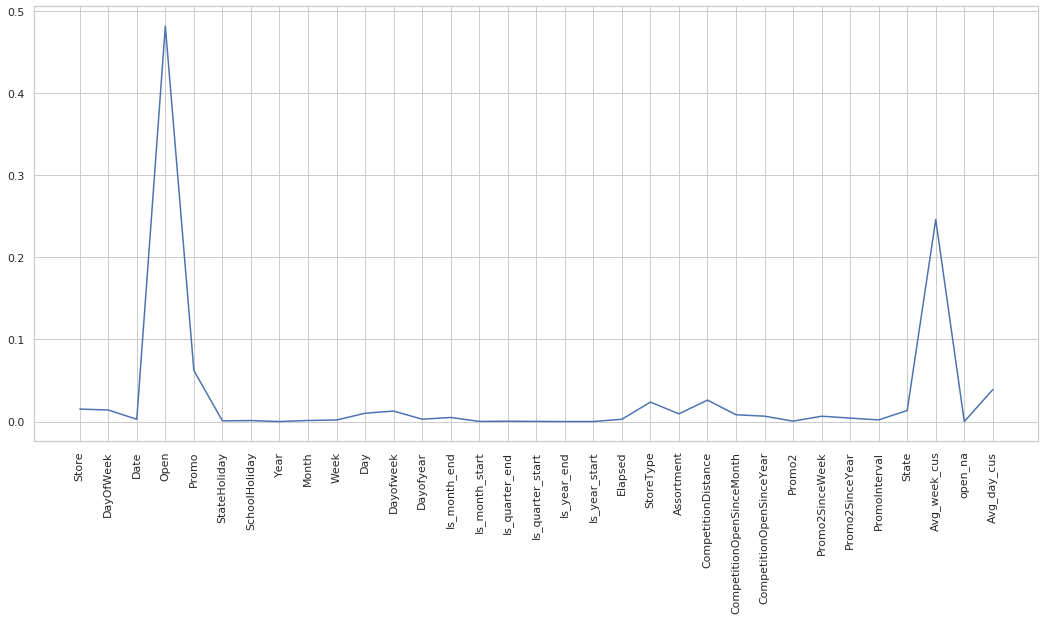

In [358]:
plt.figure(figsize=(18,8))
plt.plot(clf.feature_importances_)
plt.xticks(np.arange(df.shape[1]),df.columns.tolist(),rotation=90);

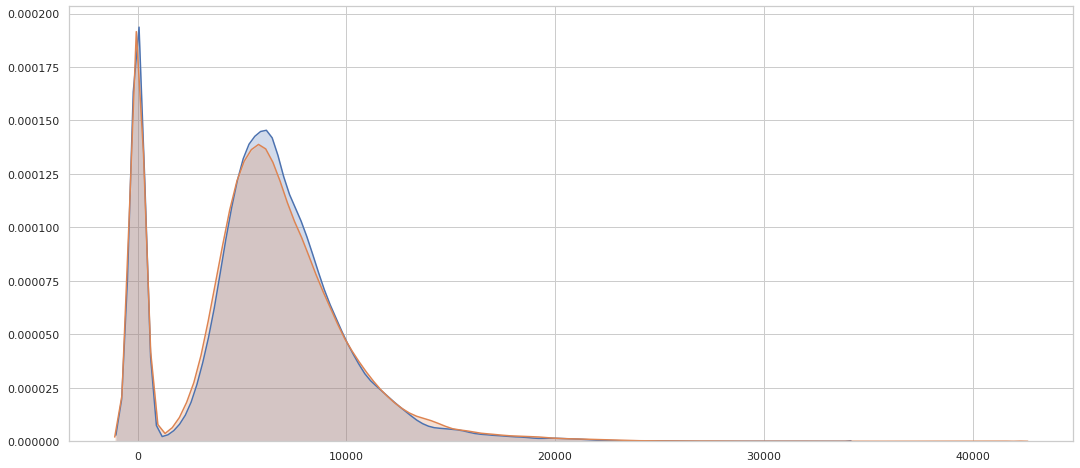

In [365]:
plt.figure(figsize=(18,8))
sns.kdeplot(y_pred,shade=True);
sns.kdeplot(y_test,shade=True);